# Linear regression 1 (basic)
## 1. data set을 분석

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [2]:
# 보스턴 집 값 데이터를 이용하여 data frame을 생성한다.
import pandas as pd

df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([df_x, df_y], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# 데이터의 기본적인 통계치들을 살펴보자.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


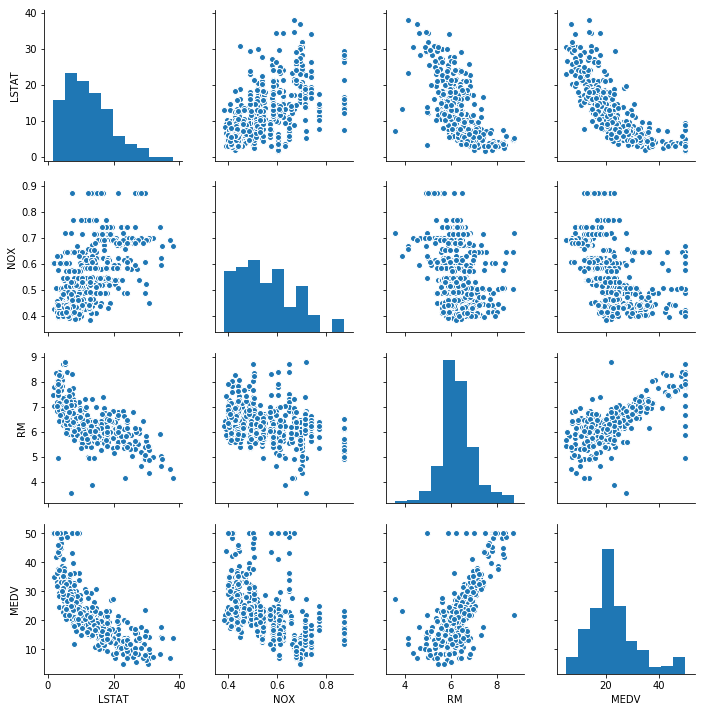

In [4]:
# 산포도를 이용하여 데이터를 시각화해보자.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cols = ["LSTAT", "NOX", "RM", "MEDV"]
sns.pairplot(df[cols])
plt.show()

## 2. `StatsModels`를 사용하여 회귀모형을 생성한다.

In [5]:
import statsmodels.regression.linear_model as lm
import statsmodels.tools.tools as sm

In [6]:
"""1. StatsModels를 사용하려면 선형회귀 모형에서 
bias, 즉 상수항(1)을 추가해주어야 한다."""
df_x = sm.add_constant(df_x)
df = pd.concat([df_x, df_y], axis=1)

In [7]:
"""2. 학습"""
model_1 = lm.OLS(df_y, df_x).fit()

In [8]:
"""3. 결과를 분석해보자."""
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 18 Mar 2018   Prob (F-statistic):          6.95e-135
Time:                        00:13:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

In [9]:
"""4. 파라미터만 살펴보자"""
model_1.params

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


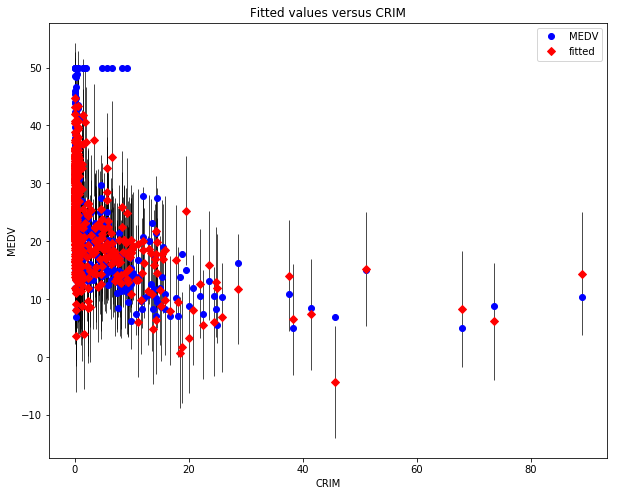

In [10]:
"""5. 특정 feature에 대한 회귀모형을 살펴보자."""
# plot크기 조절
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)

import statsmodels.api as sm_api
fig = sm_api.graphics.plot_fit(model_1, "CRIM")
# prediction interval with std
plt.show()

## 3. `sklearn`을 사용하여 회귀모형을 생성한다.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
"""1. 회귀모형을 위한 데이터"""

# sklearn을 사용하려면, data frame이 아닌 numpy array를 인풋으로 넣어야 한다.
x = boston.data
y = boston.target

In [13]:
"""2. 학습"""

# bias 즉 상수항을 추가할 필요가 없다. sklearn에서 알아서 해준다.
model_2 = LinearRegression().fit(x, y)

In [14]:
"""3. 결과 분석 : 특성별 계수"""
model_2.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [15]:
"""4. 결과 분석 : y 절편 구하기"""
model_2.intercept_

36.491103280363134

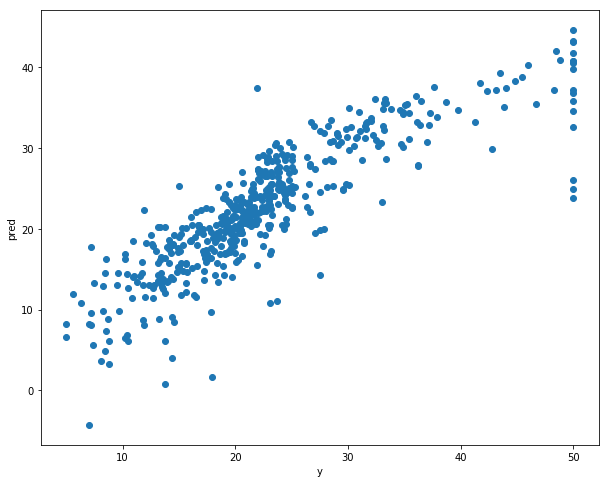

In [16]:
"""5. 모델을 이용하여 예측해보자"""

# 모델을 사용하여 예측한 값과 실제값을 산포도로 살펴보자.
pred = model_2.predict(x)

plt.scatter(y, pred)
plt.xlabel("y")
plt.ylabel("pred")
plt.show()

# Linear regression 2 (basic)
## 1. data set을 분석

In [17]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
print(linnerud.DESCR)

Linnerrud dataset

Notes
-----
Data Set Characteristics:
    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset constains two small dataset:

- *exercise*: A list containing the following components: exercise data with
  20 observations on 3 exercise variables: Weight, Waist and Pulse.

- *physiological*: Data frame with 20 observations on 3 physiological variables:
   Chins, Situps and Jumps.

References
----------
  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.



In [18]:
linnerud_df_x = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
linnerud_df_y = pd.DataFrame(linnerud.target, columns=linnerud.target_names)
linnerud_df = pd.concat([linnerud_df_x, linnerud_df_y], axis=1)

print(linnerud.feature_names)
print(linnerud.target_names)

linnerud_df

['Chins', 'Situps', 'Jumps']
['Weight', 'Waist', 'Pulse']


,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


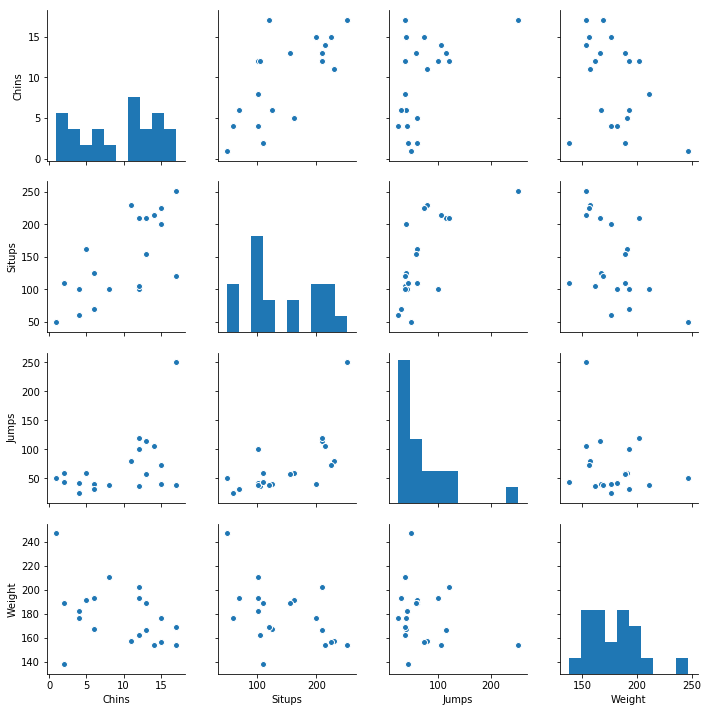

In [19]:
cols = linnerud.feature_names[:]
cols.append('Weight')

sns.pairplot(linnerud_df[cols])
plt.show()

## 2. `StatsModels`를 사용하여 회귀모형을 생성한다.

In [20]:
"""1. StatsModels를 사용하려면 선형회귀 모형에서 
bias, 즉 상수항(1)을 추가해주어야 한다."""
linnerud_df_x = sm.add_constant(linnerud_df_x)
linnerud_df = pd.concat([linnerud_df_x, linnerud_df_y], axis=1)

In [21]:
"""2. 학습"""
linnerud_model_weight_1 = lm.OLS(linnerud_df_y['Weight'], linnerud_df_x).fit()

In [22]:
"""3. 결과를 분석해보자."""
print(linnerud_model_weight_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     1.952
Date:                Sun, 18 Mar 2018   Prob (F-statistic):              0.162
Time:                        00:14:06   Log-Likelihood:                -88.876
No. Observations:                  20   AIC:                             185.8
Df Residuals:                      16   BIC:                             189.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        208.2335     13.451     15.481      0.0

In [23]:
"""4. 파라미터만 살펴보자"""
linnerud_model_weight_1.params

const     208.233519
Chins      -0.475026
Situps     -0.217716
Jumps       0.093088
dtype: float64

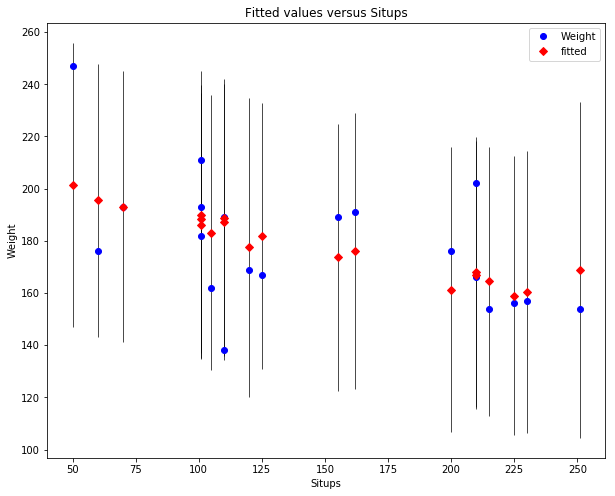

In [24]:
"""5. 특정 feature에 대한 회귀모형을 살펴보자."""
fig = sm_api.graphics.plot_fit(linnerud_model_weight_1, "Situps")
# prediction interval with std
plt.show()

## 3. `sklearn`을 사용하여 회귀모형을 생성한다.

In [25]:
"""1. 회귀모형을 위한 데이터"""

# sklearn을 사용하려면, data frame이 아닌 numpy array를 인풋으로 넣어야 한다.
x = linnerud.data
y = linnerud.target

In [26]:
"""2. 학습"""

# bias 즉 상수항을 추가할 필요가 없다. sklearn에서 알아서 해준다.
linnerud_model_Weight_2 = LinearRegression().fit(x, y[:, 0])

In [27]:
"""3. 결과 분석 : 특성별 계수"""
linnerud_model_Weight_2.coef_

array([-0.47502636, -0.21771647,  0.09308837])

In [28]:
"""4. 결과 분석 : y 절편 구하기"""
linnerud_model_Weight_2.intercept_

208.23351880696043

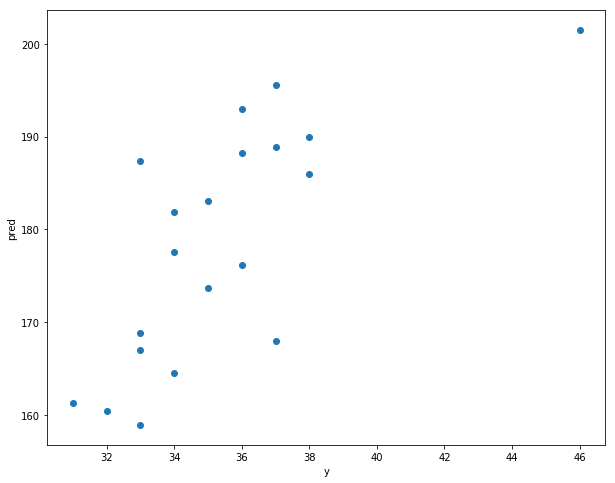

In [29]:
"""5. 모델을 이용하여 예측해보자"""

# 모델을 사용하여 예측한 값과 실제값을 산포도로 살펴보자.
pred = linnerud_model_Weight_2.predict(x)

plt.scatter(y[:, 1], pred)
plt.xlabel("y")
plt.ylabel("pred")
plt.show()

In [30]:
"""6. 결정계수를 구해보자"""
linnerud_model_Weight_2.score(x, y[:, 0])

0.2679190695529967

결정계수가 0.267로 낮다. 따라서 이 데이터 셋은 선형회귀모형으로 모델링하면 그 정확도(예측도)가 떨어지게 된다.